In [36]:
import pandas as pd
import os
os.chdir("C://Users//Janvi Acharya//Downloads")
df=pd.read_csv("Admission_Predict_Ver1.1.csv")
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [37]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [38]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [39]:
df=df.drop(["Serial No."],1)
df.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

In [40]:
y=df["Chance of Admit "]
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [41]:
df=df.drop(["Chance of Admit "],1)

In [42]:
categorical=df[["University Rating","Research"]]
categorical.head()


University Rating  Research
0                  4         1
1                  4         1
2                  3         1
3                  3         1
4                  2         0

In [43]:
numerical=df.drop(["University Rating","Research"],1)
numerical.head()

GRE Score  TOEFL Score  SOP  LOR   CGPA
0        337          118  4.5   4.5  9.65
1        324          107  4.0   4.5  8.87
2        316          104  3.0   3.5  8.00
3        322          110  3.5   2.5  8.67
4        314          103  2.0   3.0  8.21

In [44]:
numerical["Chance of Admit "]=y
numerical.head()

GRE Score  TOEFL Score  SOP  LOR   CGPA  Chance of Admit 
0        337          118  4.5   4.5  9.65              0.92
1        324          107  4.0   4.5  8.87              0.76
2        316          104  3.0   3.5  8.00              0.72
3        322          110  3.5   2.5  8.67              0.80
4        314          103  2.0   3.0  8.21              0.65

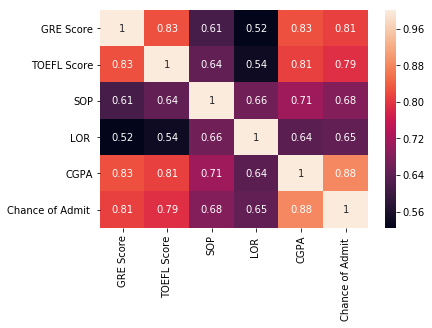

In [45]:
import numpy as np
import seaborn as sns
sns.heatmap(numerical.corr(), annot = True)

In [54]:
selected_features=["SOP","LOR ","CGPA"]

In [55]:
main=pd.concat([numerical,categorical],1)

In [56]:
main.head()

GRE Score  TOEFL Score  SOP  LOR   CGPA  Chance of Admit   \
0        337          118  4.5   4.5  9.65              0.92   
1        324          107  4.0   4.5  8.87              0.76   
2        316          104  3.0   3.5  8.00              0.72   
3        322          110  3.5   2.5  8.67              0.80   
4        314          103  2.0   3.0  8.21              0.65   

   University Rating  Research  
0                  4         1  
1                  4         1  
2                  3         1  
3                  3         1  
4                  2         0

In [57]:
X=main.drop(["Chance of Admit "],1)
y=main["Chance of Admit "]
X.head()

GRE Score  TOEFL Score  SOP  LOR   CGPA  University Rating  Research
0        337          118  4.5   4.5  9.65                  4         1
1        324          107  4.0   4.5  8.87                  4         1
2        316          104  3.0   3.5  8.00                  3         1
3        322          110  3.5   2.5  8.67                  3         1
4        314          103  2.0   3.0  8.21                  2         0

In [58]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=42)
from sklearn.metrics import r2_score,mean_squared_error,median_absolute_error
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred= lin_reg.predict(X_test)
r2_score(y_test,y_pred)
#np.sqrt(mean_squared_error(y_test,y_pred))

0.8188432567829629

In [59]:
y_pred

array([0.91457473, 0.79518127, 0.57265986, 0.70736968, 0.81588282,
       0.86206561, 0.47459746, 0.64850923, 0.82378728, 0.80741498,
       0.72193204, 0.72589118, 0.65632227, 0.93677168, 0.8241518 ,
       0.50979177, 0.83931942, 0.59727295, 0.53339576, 0.57155958,
       0.66548168, 0.55305833, 0.72232308, 0.79506004, 0.78027648,
       0.60248654, 0.94840363, 0.84741471, 0.62777011, 0.74343096,
       0.55533035, 0.73004034, 0.54474225, 0.86116288, 0.65713016,
       0.7371816 , 0.55423839, 0.95718977, 0.64364267, 0.71057279,
       0.97036982, 0.57495143, 0.67075391, 0.85830422, 0.94112903,
       0.57793762, 0.9583926 , 0.83902765, 0.79591651, 0.92570648,
       0.88805969, 0.56366238, 0.70359711, 0.52658929, 0.9536427 ,
       0.59746814, 0.95600396, 0.73916386, 0.66256982, 0.5012903 ,
       0.62950759, 0.68031188, 0.59896721, 0.59203806, 0.44085868,
       0.58866369, 0.8667547 , 0.89783006, 0.65831807, 0.70667392,
       0.6176818 , 0.78587721, 0.69152566, 0.56271019, 0.55429

In [61]:
X1=X[selected_features]
X1.head()
X1_train,X1_test,y_train,y_test=tts(X1,y,test_size=0.2,random_state=42)
from sklearn.metrics import r2_score,mean_squared_error,median_absolute_error
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
lin_reg=LinearRegression()
lin_reg.fit(X1_train,y_train)
y_pred= lin_reg.predict(X1_test)
r2_score(y_test,y_pred)
#np.sqrt(mean_squared_error(y_test,y_pred))

0.8257180089399094

In [63]:
#grid search 
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
cross_val_score(knn,X,y,cv=10,scoring="r2")

array([0.67939896, 0.45217421, 0.73330861, 0.70168496, 0.76218952,
       0.64241372, 0.75831506, 0.72447405, 0.74183265, 0.82733848])

In [64]:
params={"n_neighbors":np.arange(1,16)}
knn_cv=GridSearchCV(knn,param_grid=params,cv=10,scoring="r2")
knn_cv.fit(X,y)
knn_cv.best_score_

0.7244904862237034

In [65]:
knn_cv.best_params_

{'n_neighbors': 14}

In [66]:
#with features
#grid search 
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
cross_val_score(knn,X1,y,cv=10,scoring="r2")

array([0.70267152, 0.57361936, 0.61812441, 0.7511087 , 0.84603445,
       0.83600458, 0.65473223, 0.72984717, 0.79780408, 0.76216717])

In [67]:
params={"n_neighbors":np.arange(1,16)}
knn_cv=GridSearchCV(knn,param_grid=params,cv=10,scoring="r2")
knn_cv.fit(X1,y)
knn_cv.best_score_

0.7369055518107659

In [68]:
knn_cv.best_params_

{'n_neighbors': 8}

In [69]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 
regressor.score(X,y)
#y_pred

0.9246919853073716

In [70]:
#on selected features
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X1_train, y_train)  
y_pred = regressor.predict(X1_test) 
regressor.score(X1,y)

0.9221243248045975